<a href="https://colab.research.google.com/github/Abhiroop2004/Artificial-Intelligence-and-Machine-Learning-Lab/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignment
### Decision Tree on Wireless Sensor Dataset

Load Dataset

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("WISDM.csv", header=None)
df.head(10)

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526;
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926;
7,33,Jogging,49106652389000,-0.503953,13.947236,7.0553403;
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871;
9,33,Jogging,49106872299000,0.953424,1.375655,1.6480621;


Preprocessing

In [ ]:
df[5] = (df[5].str.replace(';', '').astype(float))

Encode Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[1]= label_encoder.fit_transform(df[1])
df.head(10)

,0,1,2,3,4,5
0,33,1,49105962326000,-0.694638,12.680544,0.503953
1,33,1,49106062271000,5.012288,11.264028,0.953424
2,33,1,49106112167000,4.903325,10.882658,-0.081722
3,33,1,49106222305000,-0.612916,18.496431,3.023717
4,33,1,49106332290000,-1.184970,12.108489,7.205164
5,33,1,49106442306000,1.375655,-2.492524,-6.510526
6,33,1,49106542312000,-0.612916,10.569390,5.706926
7,33,1,49106652389000,-0.503953,13.947236,7.055340
8,33,1,49106762313000,-8.430995,11.413852,5.134871
9,33,1,49106872299000,0.953424,1.375655,1.648062


Convert data to numpy

In [ ]:
data = df.to_numpy()
data

array([[ 3.30000000e+01,  1.00000000e+00,  4.91059623e+13,
        -6.94637700e-01,  1.26805440e+01,  5.03952860e-01],
       [ 3.30000000e+01,  1.00000000e+00,  4.91060623e+13,
         5.01228800e+00,  1.12640280e+01,  9.53424330e-01],
       [ 3.30000000e+01,  1.00000000e+00,  4.91061122e+13,
         4.90332500e+00,  1.08826580e+01, -8.17220900e-02],
       ...,
       [ 1.90000000e+01,  2.00000000e+00,  1.31623412e+14,
         9.08000000e+00, -1.38000000e+00,  1.69000000e+00],
       [ 1.90000000e+01,  2.00000000e+00,  1.31623491e+14,
         9.00000000e+00, -1.46000000e+00,  1.73000000e+00],
       [ 1.90000000e+01,  2.00000000e+00,  1.31623531e+14,
         8.88000000e+00, -1.33000000e+00,  1.61000000e+00]])

Divide data into Input and Outputs

In [ ]:
Y = data[:, 1]
X = data[:, [0, 2, 3, 4, 5]]

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(1/3), random_state=42)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Accuracy, Precision, Recall, F1-Score

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')  # Use 'macro' for multi-class, 'binary' for binary
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.991441527576693
Precision: 0.9906363160197816
Recall: 0.9900202316218086
F1 Score: 0.9903231438240452


Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[ 32709    245     10     17    531     51]
 [    56 113643     36      0     85    347]
 [     2     17  19900      3      4      3]
 [     4      1      0  16223      6      3]
 [   542    280     14      6  40082     47]
 [    36    710     10     21     46 140380]]


Correlation Matrix

In [ ]:
df = pd.DataFrame(X, columns=['1', '2', '3', '4', '5'])
corr_matrix = df.corr()
print(f'Correlation Matrix:\n{corr_matrix}')

Correlation Matrix:
          1         2         3         4         5
1  1.000000 -0.288216  0.034889  0.040746 -0.004500
2 -0.288216  1.000000 -0.056337 -0.071610  0.033625
3  0.034889 -0.056337  1.000000  0.029125  0.067996
4  0.040746 -0.071610  0.029125  1.000000  0.017386
5 -0.004500  0.033625  0.067996  0.017386  1.000000


ROC-Curve

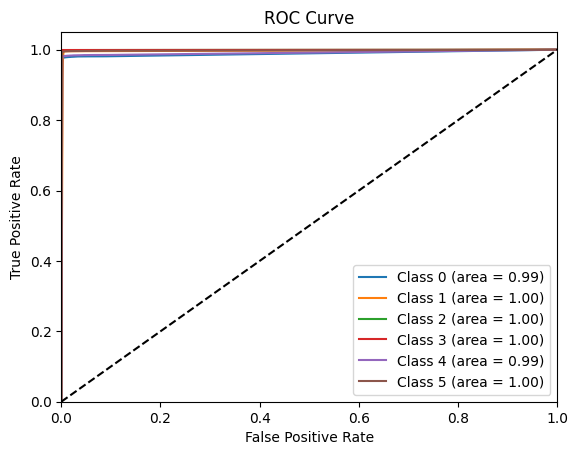

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_binarized.shape[1]

Y_pred_prob = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
import matplotlib.pyplot as plt
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()